In [3]:
# Standard library
import os
import time
import json
import itertools

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Keras layers and models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    Flatten,
    Dropout,
    Dense
)
from tensorflow.keras import regularizers

# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Callbacks
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint,
    CSVLogger
)

# Optimizers
from tensorflow.keras.optimizers import Adam

In [27]:
root_dir = r"/Users/kyawminthu/github-classroom/ML-Summer-School-by-WAI/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"
BATCH_SIZE  = 32
EPOCHS = 200
dropout_rate = 0.4
initial_lr = 1e-3
input_img_size = (128,128)
input_shape = (128,128,3)

In [11]:
# Data Augmentation
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_ds = tf_generator.flow_from_directory(
    root_dir+"/train",
    target_size=input_img_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 2202 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


0.0


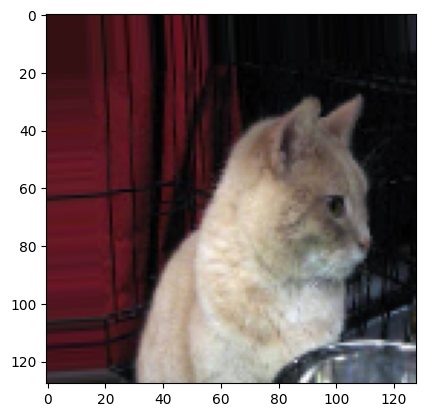

In [12]:
import matplotlib.pyplot as plt
for img,label in train_ds:
    test_img = img
    test_label = label
    break

print(test_label[0])
plt.imshow(test_img[0])

In [30]:
model = Sequential([

    Input(shape=input_shape),

    Conv2D(64, (3, 3), activation='relu', padding='same' ),  # 1. Conv2D
    Conv2D(64, (3, 3), activation='relu',padding='same' ),
    MaxPooling2D((2, 2)),    
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu',padding='same' ),
    Conv2D(128, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(256, (3, 3), activation='relu',padding='same'),
    Conv2D(256, (3, 3), activation='relu',padding='same' ),
    MaxPooling2D((2, 2)),
    BatchNormalization(),


    Conv2D(512, (3, 3), activation='relu',padding='same'),
    Conv2D(512, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(dropout_rate),

    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(dropout_rate),


    Dense(128, activation='relu'),

    Dense(1, activation='sigmoid')  #
    
])

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-3),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,111,105 (50.01 MB)

 Trainable params: 13,109,185 (50.01 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [33]:
#  exponential decay:
def exp_decay_lr_scheduler(epoch, lr):
    initial_lr = 1e-2
    end_lr = 1e-5
    decay_epochs = EPOCHS

    # Exponential decay formula
    decay_rate = (end_lr / initial_lr) ** (1 / decay_epochs)
    new_lr = initial_lr * (decay_rate ** epoch)

    print(f"[+] Epoch {epoch:2d} | LR: {new_lr:.6f}")
    return new_lr

In [34]:
# Cosine Annealing

import math

def cosine_annealing_scheduler(epoch, lr):
    initial_lr = 1e-2
    min_lr = 1e-5
    new_lr = min_lr + 0.5 * (initial_lr - min_lr) * (1 + math.cos(math.pi * epoch / EPOCHS))

    print(f"[+] Epoch {epoch:2d} | LR: {new_lr:.6f}")
    return new_lr


In [35]:
# Static Learning Rate Scheduler
base_learning_rate = 1e-3
def static_lr_scheduler(epoch, lr):
    total_epochs = EPOCHS
    
    check_1 = int(total_epochs*0.9)
    check_2 = int(total_epochs*0.7)
    check_3 = int(total_epochs*0.5)
    check_4 = int(total_epochs*0.3)

    if epoch > check_1:
        lr =  1e-5 # 0.000001
    elif  epoch > check_2:
        lr = 1e-4
    elif  epoch > check_3:
        lr = 1e-3

    else:
        lr = 1e-2

    print("[+] Current LR rate : {}".format(lr))
    return lr



In [36]:
# TensorFlow built-ins
tf_lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=5,  # epochs or batches
    decay_rate=0.5,
    staircase=True  # set False for smooth decay
)

In [37]:
curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(exp_decay_lr_scheduler)

#curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(cosine_annealing_scheduler)

# curstom_lr_callback = tf.keras.callbacks.LearningRateScheduler(static_lr_scheduler)

In [38]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,        # Log histograms every epoch (useful for weights, biases)
    write_graph=True,        # Visualize the model graph
    write_images=False,      # Log weight images (can be heavy)
    update_freq='epoch',     # 'batch' or 'epoch'
    profile_batch=0          # Set >0 to enable performance profiling
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[
        curstom_lr_callback,
        tensorboard_callback
    ]
)

[+] Epoch  0 | LR: 0.010000
Epoch 1/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.5127 - loss: 100.9932 - val_accuracy: 0.5055 - val_loss: 156.5653 - learning_rate: 0.0100
[+] Epoch  1 | LR: 0.009661
Epoch 2/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.5309 - loss: 6.8418 - val_accuracy: 0.5073 - val_loss: 17.3671 - learning_rate: 0.0097
[+] Epoch  2 | LR: 0.009333
Epoch 3/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.5000 - loss: 4.5069 - val_accuracy: 0.4873 - val_loss: 5.5591 - learning_rate: 0.0093
[+] Epoch  3 | LR: 0.009016
Epoch 4/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.5218 - loss: 3.4200 - val_accuracy: 0.5236 - val_loss: 2.1428 - learning_rate: 0.0090
[+] Epoch  4 | LR: 0.008710
Epoch 5/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.4941 - loss: 2.2646 - val_accuracy: 0.5527 - val_loss: 2.1944 - learning_rate: 0.0087
[+] Epoch  5 | LR: 0.008414
Epoch 6/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - a

In [29]:
!pipenv run tensorboard --logdir=logs/fit

Courtesy Notice:
Pipenv found itself running within a virtual environment,  so it will 
automatically use that environment, instead of  creating its own for any 
project. You can set
PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and 
create  its own instead.
You can set PIPENV_VERBOSITY=-1 to suppress this warning.
/Users/kyawminthu/.local/share/virtualenvs/6_deep_learning-J2puu_w4/lib/python3.11/site-packages/tensorboard/default.py:30: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C
